# Pet's Faces Dataset

Используем упрощенный датасет [Oxford-IIIT Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/) с вырезанными лицами домашних животных. Для начала загружаем датасет:

In [ ]:
!wget https://mslearntensorflowlp.blob.core.windows.net/data/petfaces.tar.gz
!tar xfz petfaces.tar.gz
!rm petfaces.tar.gz

--2022-05-26 12:12:21--  https://mslearntensorflowlp.blob.core.windows.net/data/petfaces.tar.gz
Resolving mslearntensorflowlp.blob.core.windows.net (mslearntensorflowlp.blob.core.windows.net)... 20.150.90.68
Connecting to mslearntensorflowlp.blob.core.windows.net (mslearntensorflowlp.blob.core.windows.net)|20.150.90.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24483412 (23M) [application/x-gzip]
Saving to: ‘petfaces.tar.gz’

petfaces.tar.gz     100%[===================>]  23.35M  --.-KB/s    in 0.1s    

2022-05-26 12:12:21 (181 MB/s) - ‘petfaces.tar.gz’ saved [24483412/24483412]



Для визуализации списка изображений можно использовать такую функцию:

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np

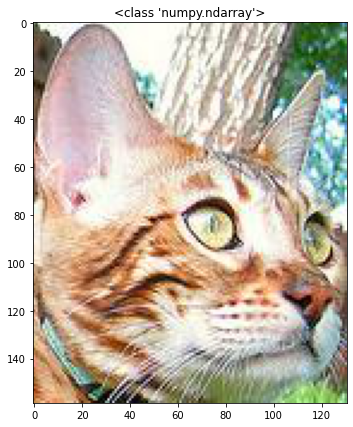

In [ ]:
import matplotlib.cbook as cbook

with cbook.get_sample_data('/content/petfaces/cat_Bengal/Bengal_10.jpg') as image_file:
    image = plt.imread(image_file)

fig, ax = plt.subplots()

ax.imshow(image)
ax.set_title(type(image))

fig.set_figwidth(7)    #  ширина и
fig.set_figheight(7)    #  высота "Figure"

plt.show()

In [ ]:
import torchvision.transforms as transforms

In [ ]:
from __future__ import print_function, division
import torch
import torch.nn as nn
from torchvision import datasets, models

In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
from torchvision.datasets import ImageFolder
def train_test_dataset(dataset, val_split=0.25):
    train_idx, val_idx = train_test_split(list(range(len(dataset))), test_size=val_split, random_state=42)
    datasets = {}
    datasets['train'] = Subset(dataset, train_idx)
    datasets['test'] = Subset(dataset, val_idx)
    return datasets

dataset = ImageFolder('petfaces', transform=transforms.Compose([transforms.Resize((128,128)),
                                                     transforms.ToTensor(),
                                                      transforms.Normalize([0.5, 0.5, 0.5],
                                                                            [0.2, 0.2, 0.2])]))
print(len(dataset))

print(list(set(dataset.targets)))

3211
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


In [ ]:
datasets = train_test_dataset(dataset)

In [ ]:
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset=datasets['train'], batch_size=20,shuffle=True) 
test_loader = DataLoader(dataset=datasets['test'], batch_size=20, shuffle=False)

In [ ]:
import shutil
shutil.rmtree('output')

FileNotFoundError: ignored

In [ ]:
os.makedirs('./output')
os.makedirs('./output/cats')
os.makedirs('./output/dogs')

In [ ]:
petfaces = os.listdir('petfaces')

In [ ]:
import shutil
for i, im in enumerate(petfaces):
  if 'cat' in petfaces[i]:
    cats = os.listdir(os.path.join('petfaces',petfaces[i]))
    for n, cat in enumerate(cats):
      shutil.copy(os.path.join(os.path.join('petfaces',petfaces[i]), cats[n]), './output/cats')
  if 'dog' in petfaces[i]:
    if len(os.listdir('./output/cats')) > len(os.listdir('./output/dogs')):
      dogs = os.listdir(os.path.join('petfaces',petfaces[i]))
      for m, dog in enumerate(dogs):
        shutil.copy(os.path.join(os.path.join('petfaces',petfaces[i]), dogs[m]), './output/dogs')

In [ ]:
dataset1 = ImageFolder('output', transform=transforms.Compose([transforms.Resize((128,128)),
                                                     transforms.ToTensor(),
                                                      transforms.Normalize([0.5, 0.5, 0.5],
                                                                            [0.2, 0.2, 0.2])]))
print(len(dataset1))

print(list(set(dataset1.targets)))

2024
[0, 1]


In [ ]:
datasets1 = train_test_dataset(dataset1)
train_loader1 = DataLoader(dataset=datasets1['train'], batch_size=20,shuffle=True) 
test_loader1 = DataLoader(dataset=datasets1['test'], batch_size=20, shuffle=False)

In [ ]:
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 3)
  #      self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 8, 3)
        self.pool = nn.MaxPool2d(4, 4)
        #self.conv3 = nn.Conv2d(32, 64, 7)
        #self.pool = nn.MaxPool2d(2, 2)
        #self.conv4 = nn.Conv2d(64, 64, 7)
        #self.pool = nn.MaxPool2d(2, 2)
        self.fl = nn.Flatten()
        self.fc1 = nn.Linear(7688, 512)
     #   self.fc2 = nn.Linear(1000, 350)
        self.fc2 = nn.Linear(512, 35)
    def forward(self, x):
        #x = self.pool(F.softsign(self.conv1(x)))
        #x = self.pool(F.softsign(self.conv2(x)))
        x = self.conv1(x)
        x = self.pool(F.softsign(self.conv2(x)))
        #x = self.pool(F.relu(self.conv3(x)))
        #x = self.pool(F.relu(self.conv4(x)))
        x = self.fl(x)
        x = F.softsign(self.fc1(x))
        #x = self.fl(x)
        #x = F.softsign(self.fc2(x))
        x = self.fc2(x)
        return x
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (fl): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=7688, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=35, bias=True)
)


In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.001)
for epoch in range(5):  
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print('%d loss: %.3f' %
                  (epoch + 1, loss.item()))
print('Finished Training')

1 loss: 2.200
2 loss: 1.824
3 loss: 0.384
4 loss: 0.550
5 loss: 0.047
Finished Training


In [ ]:
from sklearn.metrics import top_k_accuracy_score
def get_accuracy(model, loader):
  with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print('Accuracy {}%'.format(100 * correct / total))

In [ ]:
from sklearn.metrics import top_k_accuracy_score
def get_top_k_accuracy(model, loader): 
  y_pred = [] 
  y_true = [] 
 
  with torch.no_grad(): 
    for images, labels in loader: 
        outputs = model(images) 
 
        outputs = outputs.data.cpu().numpy() 
        y_pred.extend(outputs) 
         
        labels = labels.data.cpu().numpy() 
        y_true.extend(labels) 
  #print(y_pred)
  top = []
  for i in range(35):
    top.append(top_k_accuracy_score(y_true, y_pred, k = i))
 
  #print(top) 
  return top

In [ ]:
from sklearn.metrics import confusion_matrix 
 
def get_confusion_matrix(model, loader): 
  y_pred = [] 
  y_true = [] 
 
  with torch.no_grad(): 
    for images, labels in loader: 
        outputs = model(images) 
 
        outputs = (torch.max(torch.exp(outputs), 1)[1]).data.cpu().numpy() 
        y_pred.extend(outputs) 
         
        labels = labels.data.cpu().numpy() 
        y_true.extend(labels) 
  cnf = confusion_matrix(y_true, y_pred) 
 
  print(y_pred) 
  return cnf

In [ ]:
get_accuracy(net, train_loader)

Accuracy 99.95847176079734%


In [ ]:
get_confusion_matrix(net, train_loader)

[4, 17, 25, 10, 31, 16, 8, 2, 3, 12, 28, 17, 34, 1, 32, 28, 30, 25, 11, 12, 33, 5, 16, 5, 4, 8, 7, 11, 14, 32, 17, 10, 25, 10, 27, 23, 34, 8, 25, 5, 12, 33, 26, 14, 12, 25, 22, 15, 2, 23, 12, 12, 25, 20, 6, 26, 14, 28, 15, 6, 27, 8, 32, 12, 6, 20, 24, 33, 9, 13, 25, 26, 22, 18, 34, 0, 23, 26, 3, 32, 25, 12, 26, 11, 4, 12, 27, 0, 33, 34, 2, 6, 9, 28, 20, 20, 29, 10, 8, 27, 22, 0, 2, 20, 3, 16, 18, 15, 20, 27, 14, 21, 12, 30, 8, 5, 28, 32, 25, 33, 1, 1, 0, 11, 9, 28, 20, 19, 0, 24, 33, 32, 7, 11, 33, 17, 12, 4, 4, 6, 16, 4, 29, 10, 11, 18, 27, 33, 17, 3, 17, 1, 33, 14, 11, 19, 7, 18, 7, 30, 27, 26, 1, 15, 14, 32, 33, 22, 29, 28, 25, 15, 13, 24, 9, 33, 9, 1, 9, 17, 33, 12, 24, 15, 29, 3, 8, 4, 3, 1, 27, 9, 14, 11, 14, 2, 17, 27, 13, 8, 19, 14, 6, 3, 29, 28, 26, 7, 14, 27, 12, 32, 16, 6, 24, 19, 12, 31, 18, 24, 0, 31, 33, 23, 12, 0, 15, 16, 28, 31, 18, 9, 29, 23, 4, 29, 9, 17, 29, 10, 3, 23, 8, 34, 23, 11, 27, 25, 6, 15, 0, 11, 7, 7, 28, 10, 30, 13, 16, 12, 15, 3, 22, 23, 7, 6, 30, 2, 21, 

array([[65,  0,  0, ...,  0,  0,  0],
       [ 0, 58,  0, ...,  0,  0,  0],
       [ 0,  0, 60, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 68,  0,  0],
       [ 0,  0,  0, ...,  0, 66,  0],
       [ 0,  0,  0, ...,  0,  0, 69]])

In [ ]:
get_top_k_accuracy(net, train_loader)

[0.0,
 0.9995847176079734,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [ ]:
#net.eval()
get_accuracy(net, test_loader)

Accuracy 55.04358655043587%


In [ ]:
get_top_k_accuracy(net, test_loader)

[0.0,
 0.5504358655043586,
 0.688667496886675,
 0.7708592777085927,
 0.8119551681195517,
 0.8455790784557908,
 0.8729763387297634,
 0.8941469489414695,
 0.9103362391033624,
 0.9165628891656289,
 0.925280199252802,
 0.933997509339975,
 0.9389788293897883,
 0.9476961394769614,
 0.9514321295143213,
 0.9539227895392279,
 0.9613947696139477,
 0.9651307596513076,
 0.9701120797011208,
 0.9713574097135741,
 0.9738480697384807,
 0.9763387297633873,
 0.9800747198007472,
 0.9838107098381071,
 0.987546699875467,
 0.9887920298879203,
 0.9900373599003736,
 0.9925280199252802,
 0.9937733499377335,
 0.9950186799501868,
 0.9975093399750934,
 0.9975093399750934,
 0.9987546699875467,
 1.0,
 1.0]

In [ ]:
import torch.nn.functional as F
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.conv1 = nn.Conv2d(3, 12,8)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(12, 32,8)
        self.pool = nn.MaxPool2d(2, 2)
        #self.conv3 = nn.Conv2d(32, 64, 7)
        #self.pool = nn.MaxPool2d(2, 2)
        #self.conv4 = nn.Conv2d(64, 64, 7)
        #self.pool = nn.MaxPool2d(2, 2)
        self.fl = nn.Flatten()
        self.fc1 = nn.Linear(21632, 2000)
     #   self.fc2 = nn.Linear(1000, 350)
        self.fc2 = nn.Linear(2000, 2)
    def forward(self, x):
       # x = self.conv1(x)
        x = self.pool(F.softsign(self.conv1(x)))
        x = self.pool(F.softsign(self.conv2(x)))
        #x = self.pool(F.relu(self.conv3(x)))
        #x = self.pool(F.relu(self.conv4(x)))
        x = self.fl(x)
        x = F.softsign(self.fc1(x))
        #x = self.fl(x)
        #x = F.softsign(self.fc2(x))
        x = self.fc2(x)
        return x
net1 = Net1()
print(net1)

Net1(
  (conv1): Conv2d(3, 12, kernel_size=(8, 8), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 32, kernel_size=(8, 8), stride=(1, 1))
  (fl): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=21632, out_features=2000, bias=True)
  (fc2): Linear(in_features=2000, out_features=2, bias=True)
)


In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(net1.parameters(), lr=0.001)
for epoch in range(5):  
    for i, data in enumerate(train_loader1):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print('%d loss: %.3f' %
                  (epoch + 1, loss.item()))
print('Finished Training')

1 loss: 0.583
2 loss: 0.432
3 loss: 0.379
4 loss: 0.231
5 loss: 0.251
Finished Training


In [ ]:
get_accuracy(net1, train_loader1)

Accuracy 88.66930171277997%


In [ ]:
get_confusion_matrix(net1, train_loader1)

[1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 

array([[764,  68],
       [104, 582]])

In [ ]:
get_accuracy(net1, test_loader1)

Accuracy 82.80632411067194%
